# Eksperimenti na diedrski grupi

## Ali matrike z istim karakterjem konvergirajo k istim vrednostim?
### Plan dela
Za različne vrednosti karakterjev vzorčimo M naključnih matrik $R,S$ z danima karakterjema $charR, charS \in [-N, N]$. 

In [35]:
from gofi.ode.dihedral.loss import *
import numpy as np
from gofi.ode.dihedral.gradient_flow import GradientFlow

# settings for this expiriment
n=5

irr_loss = IrreducibilityLoss(n)
unit_loss = UnitaryLoss()
rel_loss = RelationLoss(n)

loss = irr_loss + unit_loss + rel_loss


# GradientFlow implements solving ODEs till convergence. Clipping_limit is used to clip gradients above it. If None, no cliping is used.
gf = GradientFlow(dim=2, loss_function=loss, clipping_limit=100)

In [36]:
from gofi.ode.dihedral.experiments.e1_char_influence import  grid
chars, samples = grid(-1,1,1,20,-1,1,gf, t_max=50, verbose=True)

Solving Gradient Flow: 100%|██████████| 1/1 [01:41<00:00, 101.91s/it]


In [37]:
R, S = samples[0]['init_points'][0]
R, S

(array([[-2.24631223,  0.83893356],
        [-0.00384973,  0.24631223]]),
 array([[-1.45618457,  0.01175669],
        [-0.19776062, -0.54381543]]))

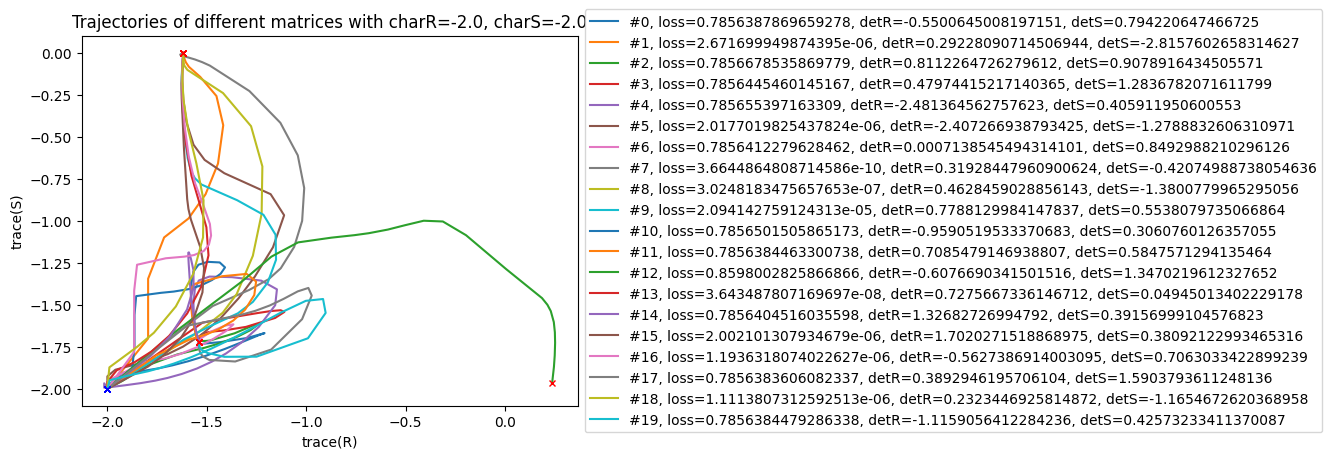

Sample 0: R=
[[-2.24631223  0.83893356]
 [-0.00384973  0.24631223]], S=
[[-1.45618457  0.01175669]
 [-0.19776062 -0.54381543]]
Sample 1: R=
[[-1.7995434  -0.20831984]
 [-0.32857861 -0.2004566 ]], S=
[[-2.99864787 -0.37863925]
 [ 0.47230453  0.99864787]]
Sample 2: R=
[[-1.4379262   0.01252505]
 [-0.23998553 -0.5620738 ]], S=
[[-1.43135254 -0.75044704]
 [ 0.12520091 -0.56864746]]
Sample 3: R=
[[-1.51961122 -0.832413  ]
 [-0.30064407 -0.48038878]], S=
[[-1.18703028  0.36675965]
 [-0.8688484  -0.81296972]]
Sample 4: R=
[[-2.98580017 -0.86944785]
 [ 0.53141514  0.98580017]], S=
[[-1.15418909  0.66096044]
 [ 0.86285613 -0.84581091]]
Sample 5: R=
[[-2.85362047  0.30455182]
 [-0.09404606  0.85362047]], S=
[[-2.60234263  0.35532115]
 [-0.81227545  0.60234263]]
Sample 6: R=
[[-2.02048972  0.10200401]
 [-0.41285761  0.02048972]], S=
[[-1.3264302   0.27215337]
 [ 0.1622045  -0.6735698 ]]
Sample 7: R=
[[-1.37885897  0.72858762]
 [ 0.73729142 -0.62114103]], S=
[[-2.19946671  0.52342463]
 [-0.0343325

In [ ]:
from  gofi.ode.dihedral.plot import get_characters, get_matrices
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

def plot_sample(sample, char=None):
    init_points = sample['init_points']
    solutions = sample['solutions']
    for i in range(len(init_points)):
        # calculate loss
        R, S = get_matrices(solutions[i].y, -1, 2)
        R0, S0 = get_matrices(solutions[i].y, 0, 2)
        l = loss(R, S)
        

        # get characters of i-th trajectory
        charR, charS = get_characters(solutions[i].y, 2)
        # plot trajectory 
        plt.plot(charR, charS, label=f"#{i}, loss={l}, detR={np.linalg.det(R0)}, detS={np.linalg.det(S0)}")
        # plot initial point
        plt.plot(charR[0], charS[0], 'xb', markersize=4) 
        # plot final point
        plt.plot(charR[-1], charS[-1], 'xr', markersize=4) 
    plt.xlabel('trace(R)')
    plt.ylabel('trace(S)')
    plt.title(f"Trajectories of different matrices with charR={charR[0]}, charS={charS[0]}")
    plt.legend()

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

plot_sample(samples[0])

for i, (R,S) in enumerate(samples[0]['init_points']): 
    pass
    #print(f"Sample {i}: R=\n{R}, S=\n{S}")



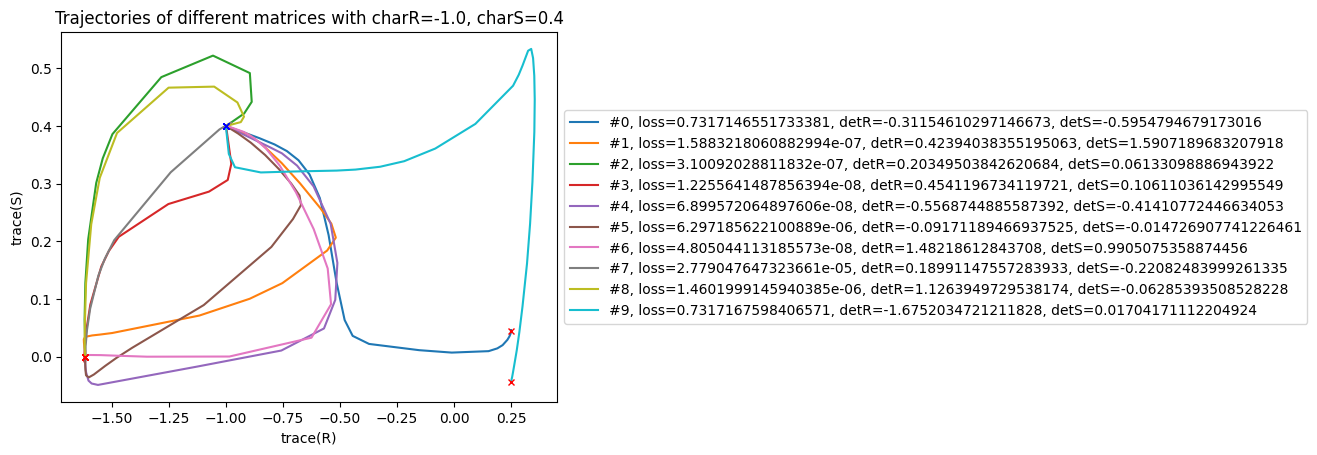

In [ ]:
from tqdm import tqdm
trR = -1 
antidiagR = -1 

trS = 0.4
antidiagS = 0.6



fig = plt.figure()
ax = plt.subplot(111)
n_samples = 50
for i in tqdm(range(n_samples), total=n_samples):
    a = np.random.rand()*2 - 1
    b = np.random.rand()*2 - 1
    R0 = np.array([[a, b],[antidiagR - b, trR - a]]) 
    a = np.random.rand()*2 - 1
    b = np.random.rand()*2 - 1
    S0 = np.array([[a, b],[antidiagS - b, trS - a]]) 
    # run 
    solution = gf.solve(R0, S0, t_max=5)
    
    # get loss
    R, S = get_matrices(solution.y, -1, 2)
    l = loss(R, S)
    # get characters
    charR, charS = get_characters(solution.y, 2)
    # plot trajectory 
    plt.plot(charR, charS, label=f"#{i}, loss={l}, detR={np.linalg.det(R0)}, detS={np.linalg.det(S0)}")
    # plot initial point
    plt.plot(charR[0], charS[0], 'xb', markersize=4) 
    # plot final point
    plt.plot(charR[-1], charS[-1], 'xr', markersize=4) 
plt.xlabel('trace(R)')
plt.ylabel('trace(S)')
plt.title(f"Trajectories of different matrices with charR={charR[0]}, charS={charS[0]}")
plt.legend()

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
    